<a href="https://colab.research.google.com/github/Krish-nobita903/es335-24-fall-assignment-2/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing

import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F


# Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

# Set env CUDA_LAUNCH_BLOCKING=1
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Retina display
%config InlineBackend.figure_format = 'retina'

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange



In [4]:
# read image from torch vision
img = torchvision.io.read_image('benz.jpg')
print(img.shape)

torch.Size([3, 2401, 3600])


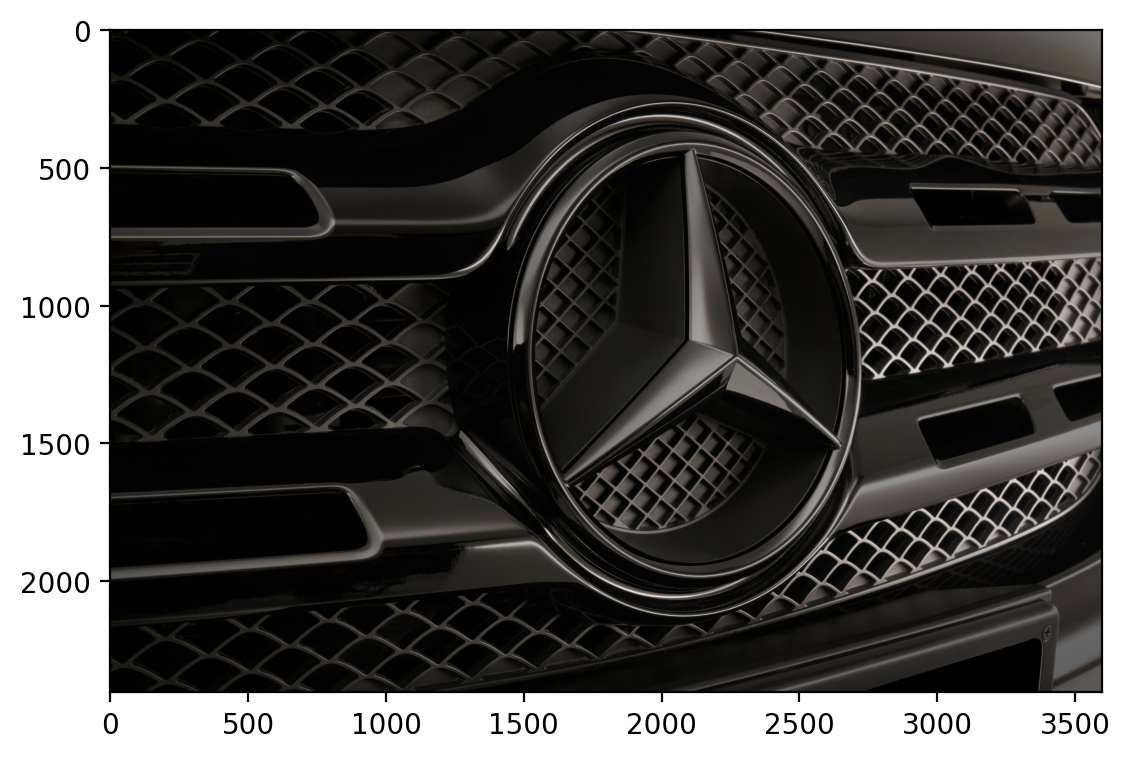

In [5]:
plt.imshow(rearrange(img, 'c h w -> h w c').numpy())

In [6]:
scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(1, -1))
scaler_img

MinMaxScaler()

In [7]:
print(img)

tensor([[[  5,   5,   4,  ..., 112, 112, 112],
         [  5,   5,   5,  ..., 112, 112, 112],
         [  5,   5,   5,  ..., 112, 112, 112],
         ...,
         [  1,   1,   1,  ...,  89,  89,  89],
         [  1,   1,   1,  ...,  88,  88,  88],
         [  1,   1,   1,  ...,  89,  89,  89]],

        [[  5,   5,   4,  ..., 111, 111, 111],
         [  5,   5,   5,  ..., 111, 111, 111],
         [  5,   5,   5,  ..., 111, 111, 111],
         ...,
         [  1,   1,   1,  ...,  88,  88,  88],
         [  1,   1,   1,  ...,  87,  87,  87],
         [  1,   1,   1,  ...,  88,  88,  88]],

        [[  3,   3,   2,  ..., 106, 106, 106],
         [  3,   3,   3,  ..., 106, 106, 106],
         [  3,   3,   3,  ..., 106, 106, 106],
         ...,
         [  1,   1,   1,  ...,  86,  86,  86],
         [  1,   1,   1,  ...,  85,  85,  85],
         [  1,   1,   1,  ...,  86,  86,  86]]], dtype=torch.uint8)


In [8]:
# Reshape the image data to be a 2D array where each row is a pixel value
img_reshaped = img.reshape(-1, 1)

# Fit the scaler on the reshaped image
scaler_img = preprocessing.MinMaxScaler()
scaler_img.fit(img_reshaped)

# Transform the reshaped image
img_scaled = scaler_img.transform(img_reshaped)

# Reshape the scaled image back to the original shape
img_scaled = img_scaled.reshape(img.shape)

img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
print(img_scaled.shape)
img_scaled = torch.tensor(img_scaled)

img_scaled = torch.tensor(img_scaled)
img_scaled = img_scaled.to(device)
print(img_scaled)

(3, 2401, 3600)
tensor([[[0.0196, 0.0196, 0.0157,  ..., 0.4392, 0.4392, 0.4392],
         [0.0196, 0.0196, 0.0196,  ..., 0.4392, 0.4392, 0.4392],
         [0.0196, 0.0196, 0.0196,  ..., 0.4392, 0.4392, 0.4392],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.3490, 0.3490, 0.3490],
         [0.0039, 0.0039, 0.0039,  ..., 0.3451, 0.3451, 0.3451],
         [0.0039, 0.0039, 0.0039,  ..., 0.3490, 0.3490, 0.3490]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.4353, 0.4353, 0.4353],
         [0.0196, 0.0196, 0.0196,  ..., 0.4353, 0.4353, 0.4353],
         [0.0196, 0.0196, 0.0196,  ..., 0.4353, 0.4353, 0.4353],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.3451, 0.3451, 0.3451],
         [0.0039, 0.0039, 0.0039,  ..., 0.3412, 0.3412, 0.3412],
         [0.0039, 0.0039, 0.0039,  ..., 0.3451, 0.3451, 0.3451]],

        [[0.0118, 0.0118, 0.0078,  ..., 0.4157, 0.4157, 0.4157],
         [0.0118, 0.0118, 0.0118,  ..., 0.4157, 0.4157, 0.4157],
         [0.0118, 0.0118, 0.0118,  ..., 0.

In [9]:
crop = torchvision.transforms.functional.crop(img_scaled.cpu(),1000, 2100, 300, 300 )
crop.shape

torch.Size([3, 300, 300])

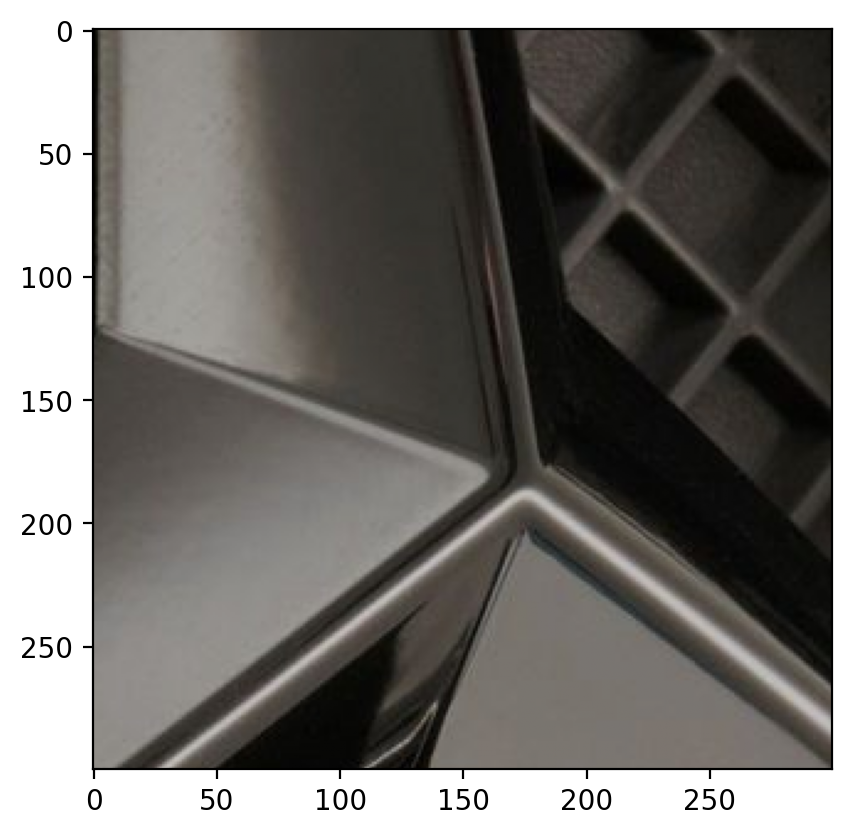

In [10]:
plt.imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())

In [11]:
crop = crop.to(device)

In [12]:
num_channels, height, width = crop.shape

# no meaning
# Create a 2D grid of (x,y) coordinates
w_coords = torch.arange(width).repeat(height, 1)
h_coords = torch.arange(height).repeat(width, 1).t()
w_coords = w_coords.reshape(-1)
h_coords = h_coords.reshape(-1)

# Combine the x and y coordinates into a single tensor
benz_X = torch.stack([h_coords, w_coords], dim=1).float()

benz_X = benz_X.to(device)

benz_Y = rearrange(crop, 'c h w -> (h w) c').float()
benz_X.shape, benz_Y.shape

(torch.Size([90000, 2]), torch.Size([90000, 3]))

In [13]:
scaler_X = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(benz_X.cpu())

# Scale the X coordinates
benz_X_scaled = scaler_X.transform(benz_X.cpu())

# Move the scaled X coordinates to the GPU
benz_X_scaled = torch.tensor(benz_X_scaled).to(device)

# Set to dtype float32
benz_X_scaled = benz_X_scaled.float()
print(benz_X_scaled)


tensor([[-1.0000, -1.0000],
        [-1.0000, -0.9933],
        [-1.0000, -0.9866],
        ...,
        [ 1.0000,  0.9866],
        [ 1.0000,  0.9933],
        [ 1.0000,  1.0000]])


In [14]:
class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

In [15]:
net = LinearModel(2, 3)
net.to(device)

LinearModel(
  (linear): Linear(in_features=2, out_features=3, bias=True)
)

In [16]:
def train(net, lr, X, Y, epochs, verbose=True):
    """
    net: torch.nn.Module
    lr: float
    X: torch.Tensor of shape (num_samples, 2)
    Y: torch.Tensor of shape (num_samples, 3)
    """

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = net(X)


        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch} loss: {loss.item():.6f}")
    return loss.item()

In [17]:
train(net, 0.01, benz_X_scaled, benz_Y, 1000)

Epoch 0 loss: 0.477453
Epoch 100 loss: 0.026397
Epoch 200 loss: 0.022106
Epoch 300 loss: 0.022105
Epoch 400 loss: 0.022105
Epoch 500 loss: 0.022105
Epoch 600 loss: 0.022105
Epoch 700 loss: 0.022105
Epoch 800 loss: 0.022105
Epoch 900 loss: 0.022105


0.022105341777205467

In [18]:
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))


def plot_reconstructed_and_original_image(original_img, net, X, title=""):
    """
    net: torch.nn.Module
    X: torch.Tensor of shape (num_samples, 2)
    Y: torch.Tensor of shape (num_samples, 3)
    """
    num_channels, height, width = original_img.shape
    net.eval()
    with torch.no_grad():
        outputs = net(X)
        outputs = outputs.reshape(height, width, num_channels)
        #outputs = outputs.permute(1, 2, 0)
    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    # print(outputs.shape)
    # print(original_img.shape)
    # original_img = original_img.permute(2, 1, 0
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    ax0.imshow(outputs.cpu())
    ax0.set_title("Reconstructed Image")


    ax1.imshow(original_img.cpu().permute(1, 2, 0))
    ax1.set_title("Original Image")

    for a in [ax0, ax1]:
        a.axis("off")


    fig.suptitle(title, y=0.9)
    plt.tight_layout()
    outputs = outputs.permute(2, 1, 0)
    # print(outputs.shape)
    # print(original_img.shape)
    rmse_linear = calculate_rmse(original_img.cpu().numpy(), outputs.cpu().numpy())
    psnr_linear = calculate_psnr(original_img.cpu().numpy(), outputs.cpu().numpy())

    # Print RMSE and PSNR
    print(f"{title}: RMSE = {rmse_linear:.2f}, PSNR = {psnr_linear:.2f} dB")



Original vs Reconstructed Image for linear : RMSE = 0.26, PSNR = 59.97 dB


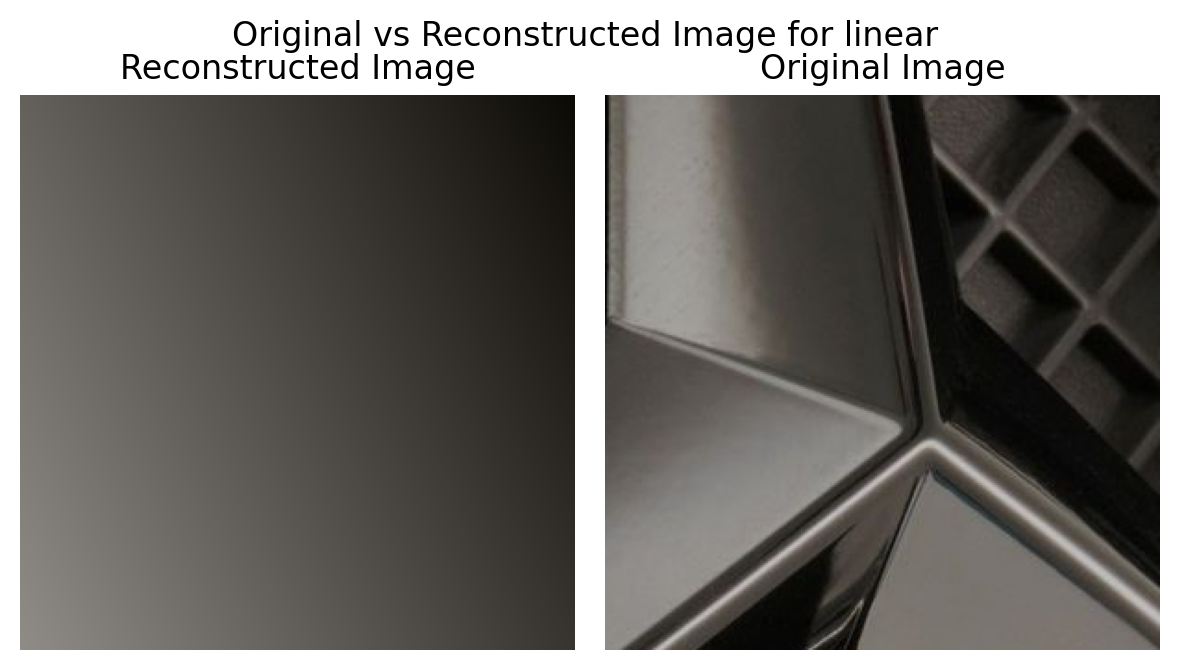

In [19]:
plot_reconstructed_and_original_image(crop, net, benz_X_scaled, title="Original vs Reconstructed Image for linear ")

In [20]:
# create RFF features
def create_rff_features(X, num_features, sigma):
    from sklearn.kernel_approximation import RBFSampler
    rff = RBFSampler(n_components=num_features, gamma=1/(2 * sigma**2))
    X = X.cpu().numpy()
    X = rff.fit_transform(X)
    return torch.tensor(X, dtype=torch.float32).to(device)

In [21]:
X_rff = create_rff_features(benz_X_scaled, 37500, 0.008)

In [22]:
X_rff.shape

torch.Size([90000, 37500])

In [23]:
net = LinearModel(X_rff.shape[1], 3)
net.to(device)

train(net, 0.005, X_rff, benz_Y, 2500)

Epoch 0 loss: 0.118950
Epoch 100 loss: 0.013512
Epoch 200 loss: 0.006778
Epoch 300 loss: 0.003390
Epoch 400 loss: 0.001639
Epoch 500 loss: 0.000776
Epoch 600 loss: 0.000379
Epoch 700 loss: 0.000208
Epoch 800 loss: 0.000139
Epoch 900 loss: 0.000112
Epoch 1000 loss: 0.000102
Epoch 1100 loss: 0.000097
Epoch 1200 loss: 0.000095
Epoch 1300 loss: 0.000093
Epoch 1400 loss: 0.000092
Epoch 1500 loss: 0.000091
Epoch 1600 loss: 0.000091
Epoch 1700 loss: 0.000090
Epoch 1800 loss: 0.000090
Epoch 1900 loss: 0.000089
Epoch 2000 loss: 0.000089
Epoch 2100 loss: 0.000089
Epoch 2200 loss: 0.000088
Epoch 2300 loss: 0.000088
Epoch 2400 loss: 0.000088


8.78106220625341e-05

Reconstructed Image with RFF Features: RMSE = 0.30, PSNR = 58.57 dB


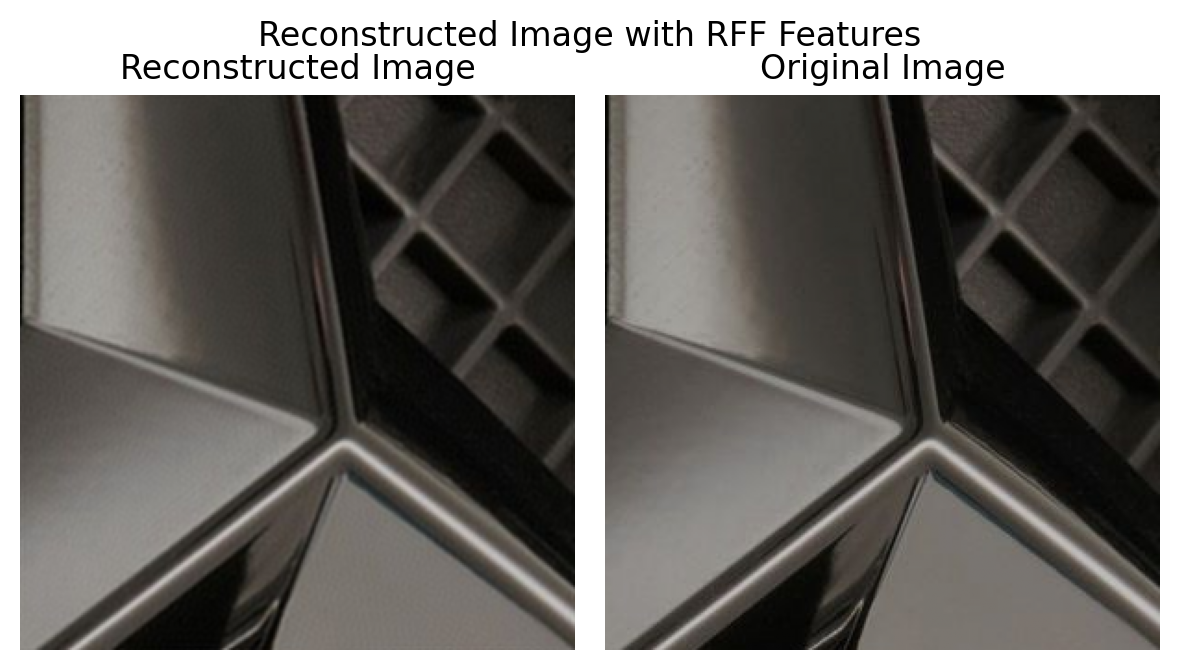

In [24]:
plot_reconstructed_and_original_image(crop, net, X_rff, title="Reconstructed Image with RFF Features")


#Task 2

In [25]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import soundfile

%matplotlib inline
%config InlineBackend.figure_format = "retina"

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)

cpu


In [28]:
from IPython.display import Audio
Audio('song.wav')


In [29]:
import torchaudio
audio, sr = torchaudio.load('./song.wav')

In [30]:
sr


44100

In [31]:
print(audio.shape)
audio = audio[0]


torch.Size([2, 7286447])


In [32]:
tm = audio.shape[0] / sr
print(f"Audio length: {tm} seconds")

Audio length: 165.22555555555556 seconds


In [ ]:
audio

In [33]:
def audio_plot(audio, sr, clr, tl):
    plt.figure(figsize=(15, 4))
    plt.plot(audio, color = clr, alpha = 0.7)
    plt.xticks(np.arange(0, audio.shape[0], sr), np.arange(0, audio.shape[0] / sr, 1))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(tl)
    plt.grid()
    plt.show()

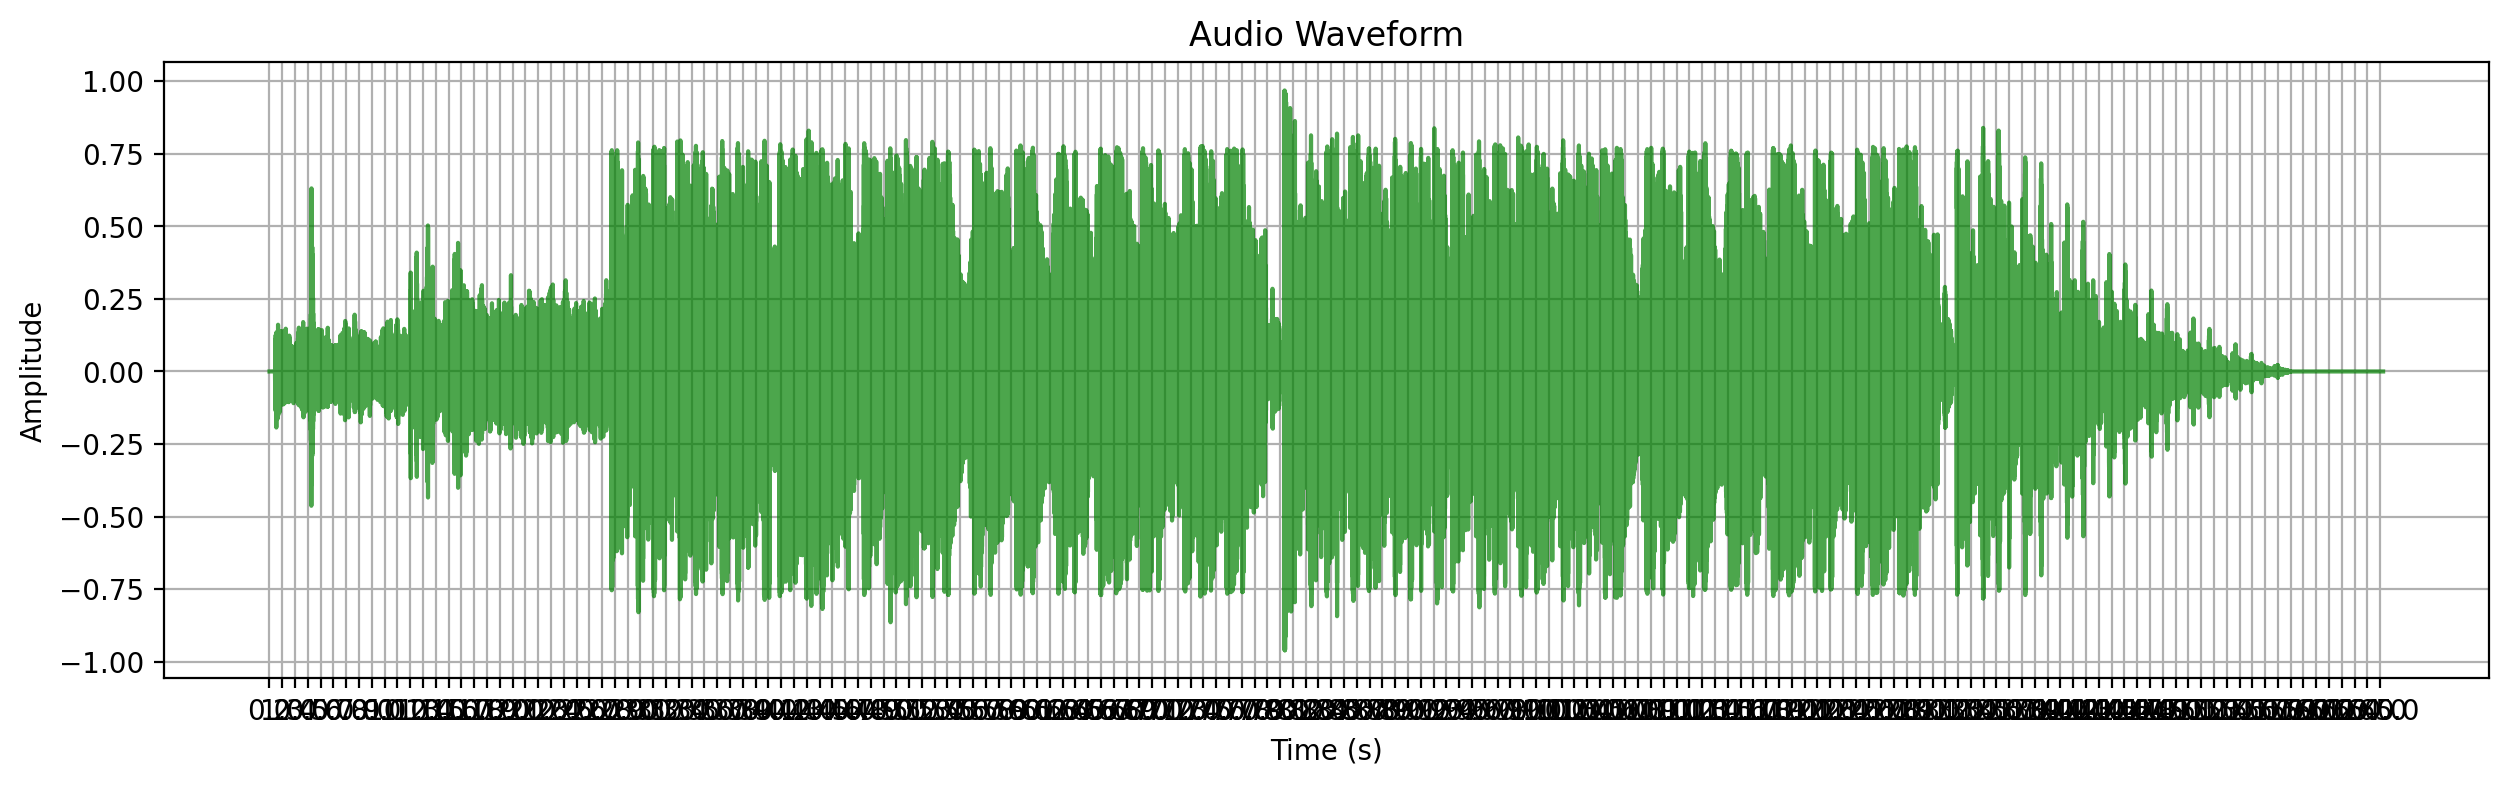

In [34]:
audio_plot(audio, sr, 'green', 'Audio Waveform')

In [35]:
start_time = 0.5
end_time = 5.5


start_index = int(start_time * sr)
end_index = int(end_time * sr)


audio = audio[start_index:end_index]


print(audio.shape)
print(audio)

torch.Size([220500])
tensor([-0.0053, -0.0092, -0.0134,  ..., -0.0287, -0.0321, -0.0363])


In [36]:
X = torch.arange(0, len(audio)).unsqueeze(1).float()
X = X / X.max() * 200 - 100
print(X.shape)
print(X)

torch.Size([220500, 1])
tensor([[-100.0000],
        [ -99.9991],
        [ -99.9982],
        ...,
        [  99.9982],
        [  99.9991],
        [ 100.0000]])


In [37]:
Audio(audio, rate = sr)

In [38]:
from sklearn.kernel_approximation import RBFSampler

def create_rff_features(X, num_features, sigma):
    # Set a random state to the sampler for repoducibility
    rff = RBFSampler(n_components = num_features, gamma = 1 / (2 * sigma**2), random_state = 13)
    X = X.cpu().numpy()
    X = rff.fit_transform(X)
    return torch.tensor(X, dtype = torch.float32)

In [39]:
num_features = 5000
sigma = 0.008

X_rff = create_rff_features(X, num_features, sigma)
print(X_rff.shape)
print(X_rff)

torch.Size([220500, 5000])
tensor([[ 0.0088, -0.0179, -0.0190,  ..., -0.0196,  0.0071, -0.0053],
        [ 0.0074, -0.0186, -0.0190,  ..., -0.0197,  0.0080, -0.0069],
        [ 0.0058, -0.0191, -0.0190,  ..., -0.0197,  0.0088, -0.0083],
        ...,
        [-0.0103, -0.0194, -0.0145,  ...,  0.0059, -0.0014, -0.0125],
        [-0.0089, -0.0189, -0.0145,  ...,  0.0064, -0.0004, -0.0137],
        [-0.0074, -0.0183, -0.0144,  ...,  0.0068,  0.0005, -0.0148]])


In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_rff.numpy(), audio)

pred_audio = model.predict(X_rff.numpy())
print(pred_audio.shape)

(220500,)


In [41]:
import joblib
joblib.dump(model, 'model.pkl')
model = joblib.load('model.pkl')

import soundfile as sf
sf.write('pred_audio.wav', pred_audio, sr)

In [42]:
Audio(pred_audio, rate = sr)

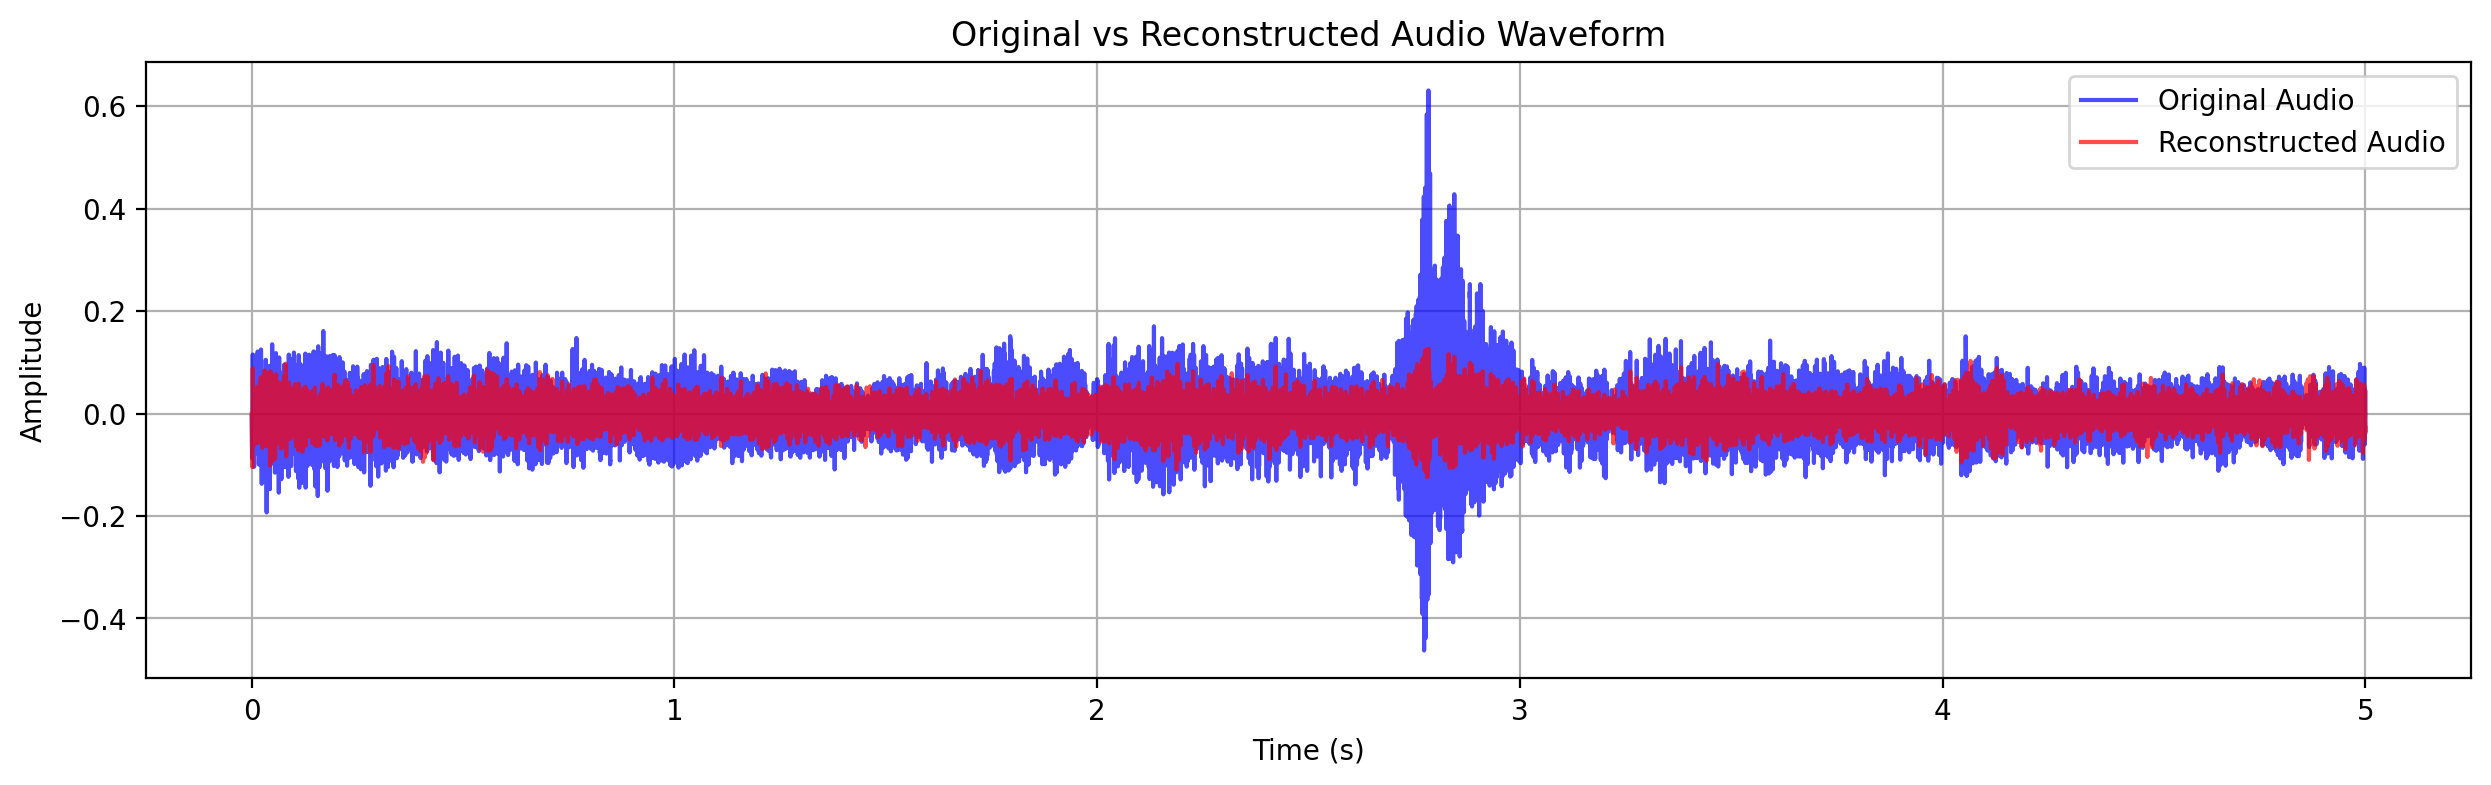

In [43]:
plt.figure(figsize=(15, 4))
time_axis = np.arange(audio.shape[0]) / sr
plt.plot(time_axis,audio, color = 'blue', alpha = 0.7, label = 'Original Audio')
plt.plot(time_axis,pred_audio, color = 'red', alpha = 0.7, label = 'Reconstructed Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed Audio Waveform')
plt.grid()
plt.legend()
plt.show()

In [44]:

rmse = np.sqrt(np.mean((audio.numpy() - pred_audio) ** 2))

# Calculate SNR
signal_power = np.mean(audio.numpy() ** 2)
noise_power = np.mean((audio.numpy() - pred_audio) ** 2)
snr = 10 * np.log10(signal_power / noise_power)

print(f"RMSE: {rmse}")
print(f"SNR: {snr} dB")

RMSE: 0.039966944605112076
SNR: 1.573285460472107 dB
